In [15]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import Image

In [16]:
class Loader:
    def __init__(self, path) -> None:
        self.path = path
        self.get_file_object()
        self.get_keys()
    def get_file_object(self):
        self.file = h5py.File(self.path, 'r')
    def close_file_object(self):
        self.file.close()
    def get_keys(self):
        self.keys = list(self.file.keys())

In [19]:
path = "Data/raw/quark-gluon_data-set_n139306.hdf5"
data = Loader(path)

In [20]:
data.file["X_jets"][139305:].shape

(1, 125, 125, 3)

In [21]:
data.keys

['X_jets', 'm0', 'pt', 'y']

In [22]:
X_jets = data.file[data.keys[0]][:100]
m0 = data.file[data.keys[1]][:100]
pt = data.file[data.keys[2]][:100]
y = data.file[data.keys[3]][:100]

In [23]:
X_jets.shape

(100, 125, 125, 3)

In [24]:
img = Image(X_jets[0])
X_jets[0].shape

(125, 125, 3)

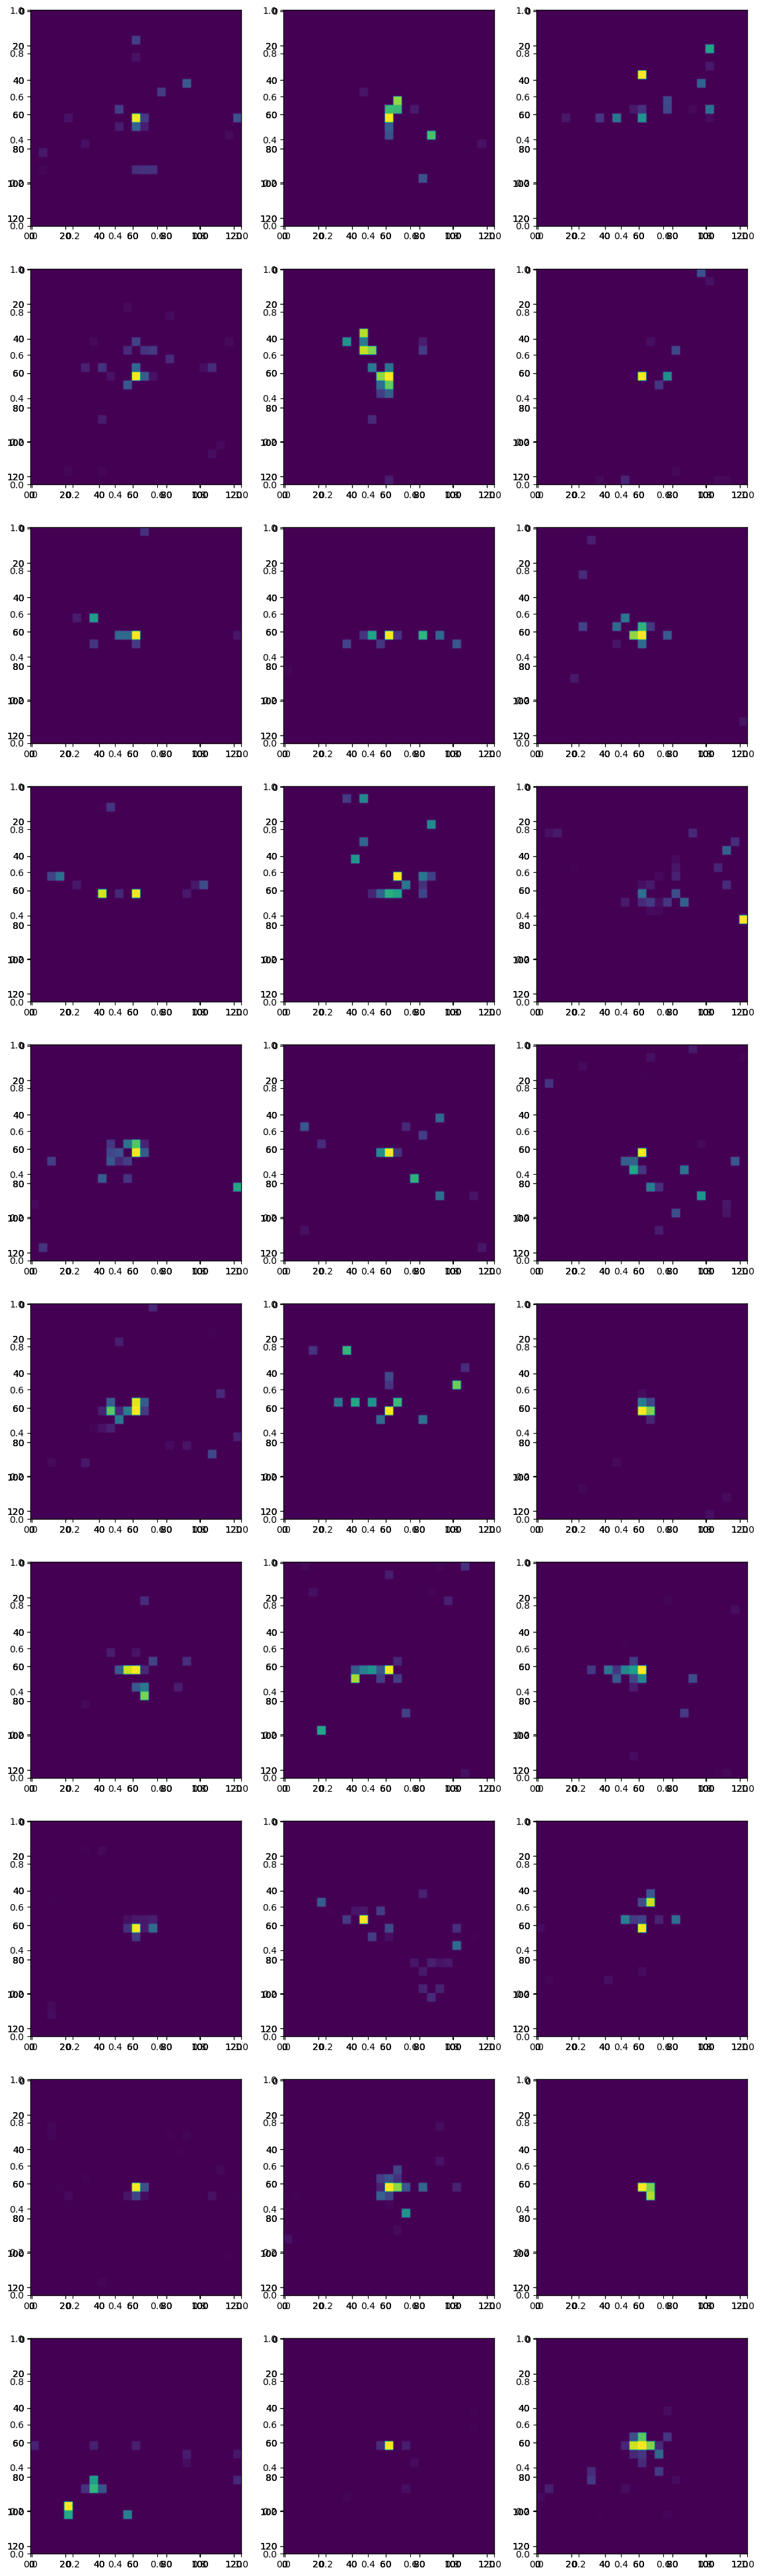

In [43]:
img_num = 10
rows = 10
cols = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize = (14, 50))

for num in range(1, rows*cols + 1):
    for i in range(3):
        fig.add_subplot(rows, cols, num)
        idx = num-1
        plt.imshow(X_jets[idx][..., i], aspect="auto")

plt.show()

In [1]:
from src.model import AutoEncoder, Encoder, Decoder
from src.data import QuarkDataset
from torch.utils.data import DataLoader, Subset, random_split
from sklearn.model_selection import train_test_split
from pytorch_lightning.trainer.trainer import Trainer

In [2]:
path = "Data/processed/quark-gluon-uncompressed.hdf5"

In [3]:
dataset = QuarkDataset(path)

In [4]:
def train_val_test_split(dataset, train = 0.7, val = 0.1, test = 0.2):
    train_data, val_data, test_data = random_split(dataset, [0.6, 0.2, 0.2])
    datasets = {}
    datasets['train'] = train_data
    datasets['val'] = val_data
    datasets['test'] = test_data
    return datasets

In [5]:
dataset = train_val_test_split(dataset)

In [6]:
data_loaders = {x:DataLoader(dataset[x], 128, shuffle=True, num_workers=8) for x in ['train', 'val', 'test']}

In [7]:
encoder = Encoder()
decoder = Decoder()
model = AutoEncoder()

In [8]:
trainer = Trainer(max_epochs=10, default_root_dir="trained_models")

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/guru/miniconda3/envs/gnn/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
/home/guru/miniconda3/envs/gnn/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(


In [9]:
trainer.fit(model, data_loaders['train'], data_loaders['val'])

Missing logger folder: trained_models/lightning_logs

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 1.9 K 
1 | decoder | Decoder | 1.5 K 
------------------------------------
3.4 K     Trainable params
0         Non-trainable params
3.4 K     Total params
0.014     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/guru/miniconda3/envs/gnn/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:488: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [1]:
for batch in data_loaders['test']:
    x = batch
    break

NameError: name 'data_loaders' is not defined

In [ ]:
img_num = 2
rows = 1
cols = 2

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize = (10, 5))
fig.add_subplot(rows, cols, num)
plt.imshow(x, aspect="auto")
fig.add_subplot(rows, cols, num)
plt.imshow(X_jets[0], aspect="auto")
fig.tight_layout()
plt.show()

In [30]:
x_ = model(x)

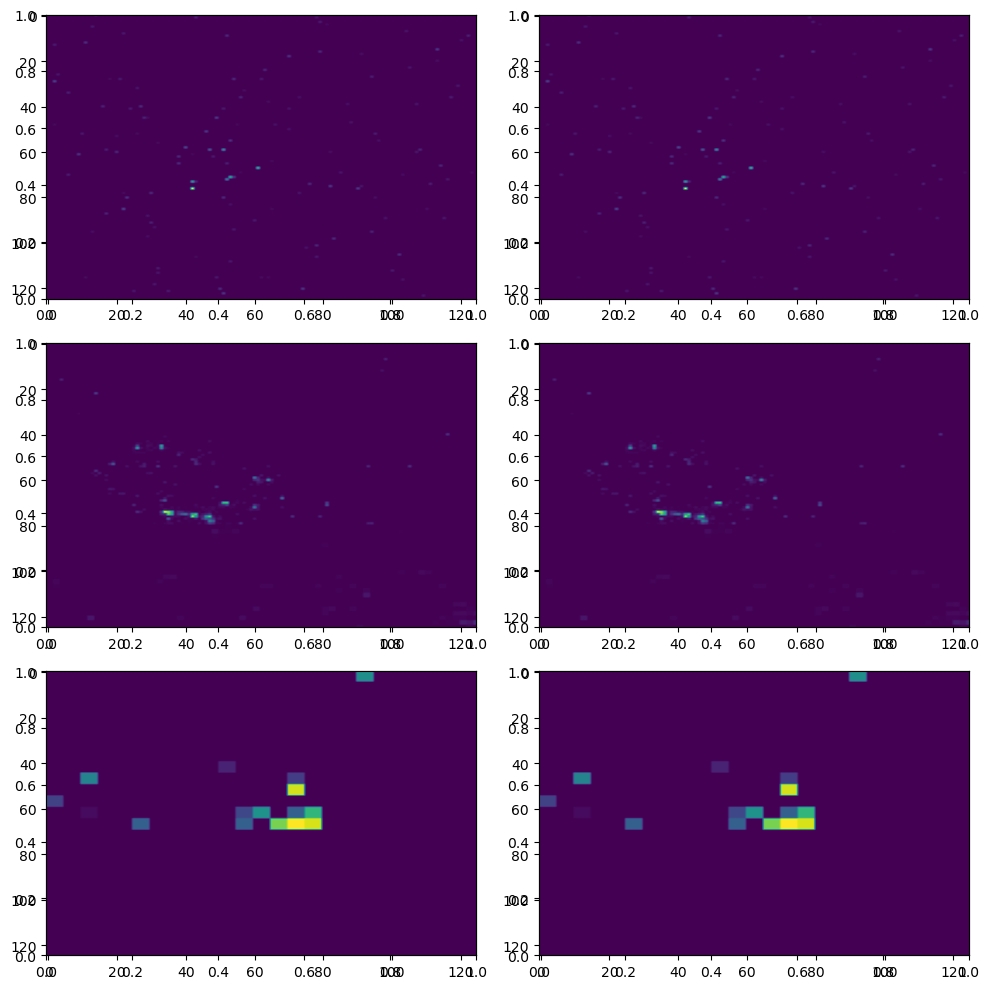

In [33]:
n = 6
rows = 3
cols = 2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (10,10))
for i, idx in enumerate(range(1, 6, 2)):
    fig.add_subplot(rows, cols, idx)
    plt.imshow(x[0][i], aspect='auto')
    fig.add_subplot(rows, cols, idx+1)
    plt.imshow(x[0][i], aspect='auto')

fig.tight_layout()
plt.show()

In [1]:
import dask.dataframe as dd

In [2]:
snappy_path = "Data/raw/Boosted_Jets_Sample-1.snappy.parquet"
df = dd.read_parquet(snappy_path)

In [3]:
df.head()

: 

: 